# Deutsch-Jozsa 알고리즘

이 절에서는 먼저 Deutsch-Jozsa 문제를 소개하고 고전 및 양자 알고리즘으로 이 문제를 해결하는 방법을 소개합니다. 그런 다음 Qiskit 으로 양자 알고리즘을 구현하고 시뮬레이터와 실제 장비에서 실행해봅니다.

## 1. 소개<a id="introduction"></a>

Deutsch-Jozsa 알고리즘은 참고문헌 [1]에 처음 소개되었으며, 최고의 고전 알고리즘보다 뛰어난 양자 알고리즘의 첫 번째 예제입니다. 이 예제를 통해 특정한 문제에 대한 계산 도구로서 양자 컴퓨터를 사용하면 몇 가지 장점이 있음을 보였습니다.

### 1.1 Deutsch-Jozsa 문제<a id="djproblem"> </a>

비트 문자열을 입력으로 받아 $0$ 또는 $1$을 반환하는 숨겨진(hidden) 부울(Boolean) 함수가 있을 때 즉,

$$ f({x_0,x_1,x_2,...}) \rightarrow 0 \textrm{ or } 1 \textrm{ , where } x_n \textrm{ is } 0 \textrm{ or } 1$$

이러한 부울 함수의 속성은 평형(balanced) 또는 고정(constant)을 보장한다는 것입니다. 고정 함수는 모든 입력에 대해 모두 $0$ 이거나 모두 $1$을 반환하는 반면 평형 함수는 정확히 입력의 절반은 $0$ 반환하고 나머지 절반은 $1$을 반환합니다. 함수가 평형 인지 고정 인지 결정하는 것이 풀어야 할 문제입니다.

Deutsch-Jozsa 문제는 단일 비트 Deutsch 문제를 $n$ 비트로 확장한 것임을 알아두시기 바랍니다.

### 1.2 고전 해법 <a id="classical-solution"> </a>

고전적으로 가장 좋은 경우 오라클에 대한 두 개의 쿼리는 숨겨진 부울 함수 $f(x)$가 평형을 이루는지 결정할 수 있습니다. 예를 들어 $f(0,0,0,...)\rightarrow 0$ 와 $f(1,0,0,...) \rightarrow 1$ 가 있다면 두 개의 다른 출력을 얻었으므로 함수가 평형을 이루고 있음을 알 수 있습니다.

최악의 경우 각 입력에 대해 계속해서 같은 출력을 얻는다면 가능한 모든 입력의 절반에 1을 더해서 $f(x)$가 고정 인지 확인해야 합니다. 가능한 입력의 전체 수가 $2^n$ 이기 때문에, 가장 나쁜 경우에 $f(x)$가 고정 인지 확인 하려면 $2^{n-1}+1$ 번 입력을 해봐야 합니다. 예를 들어, $4$ 비트 문자열에 대해, $16$개의 가능한 조합 중에 $8$번을 확인해서 모두 $0$을 얻었더라도, $9^\textrm{th}$번째 입력에 대해 $1$ 을 반환해서 $f(x)$가 평형일 가능성이 여전히 존재합니다. 확률적으로, 이는 매우 드문 사건입니다. 사실, 연속적인 시도에서 매번 같은 결과를 얻는다면, $k$ 입력의 함수로서 고정 함수라는 확률을 다음과 같이 표현할 수 있습니다.

$$ P_\textrm{constant}(k) = 1 - \frac{1}{2^{k-1}} \qquad \textrm{for } 1 &lt; k \leq 2^{n-1}$$

현실적으로 x% 이상의 확신이 있다면 고전 알고리즘을 조기에 종료할 수 있습니다. 하지만 100% 확신을 원한다면 $2^{n-1}+1$번 입력을 확인해야 합니다.

### 1.3 양자 해법 <a id="quantum-solution"> </a>

양자 컴퓨터를 사용해서 양자 오라클로 구현된 함수 $f$가 있을 때 함수 $f(x)$를 단지 한 번만 호출하여 100% 확신으로 이 문제를 풀 수 있습니다. 양자 오라클은 양자 상태 $\vert x\rangle \vert y\rangle $ 를 $ \vert x\rangle \vert y \oplus f(x)\rangle$ 로 대응시킵니다. 여기서 $\oplus$ 은 모듈러 $2$ 덧셈입니다. 아래 그림은 Deutsch-Jozsa 알고리즘에 대한 일반적인 양자 회로 입니다.

![image1](images/deutsch_steps.png)

지금부터 알고리즘의 단계를 살펴보도록 합시다.

1.          2개의 양자 레지스터를 준비합니다. 첫 번째는 $|0\rangle$로 초기화된 $n$ 비트 큐비트이고 두 번째는 $|1\rangle$로 초기화된 단일 큐비트 레지스터 입니다.

    $$\vert \psi_0 \rangle = \vert0\rangle^{\otimes n} \vert 1\rangle$$

2. 각 큐비트에 Hadamard 게이트를 적용합니다.

    $$\vert \psi_1 \rangle = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \vert x\rangle \left(|0\rangle - |1 \rangle \right)$$

3.          양자 오라클인 $\vert x\rangle \vert y\rangle$ 를 $\vert x\rangle \vert y \oplus f(x)\rangle$ 에 적용합니다:         $$             \begin{aligned}             \lvert \psi_2 \rangle                   &amp; = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \vert x\rangle (\vert f(x)\rangle - \vert 1 \oplus f(x)\rangle) \\                   &amp; = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1}(-1)^{f(x)}|x\rangle ( |0\rangle - |1\rangle )          \end{aligned}         $$

    각각의 $x에 대해 f(x)$ 은 $0$ 또는 $1$ 이기 때문입니다.

4.         이 시점에서 두 번째 단일 큐비트 레지스터는 무시됩니다. 첫 번째 레지스터에 있는 각 큐비트에 하다마드 게이트를 적용합니다:         $$         \begin{aligned}             \lvert \psi_3 \rangle                  &amp; = \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f(x)}                     \left[ \sum_{y=0}^{2^n-1}(-1)^{x \cdot y}                      \vert y \rangle \right] \\                 &amp; = \frac{1}{2^n}\sum_{y=0}^{2^n-1}                     \left[ \sum_{x=0}^{2^n-1}(-1)^{f(x)}(-1)^{x \cdot y} \right]                     \vert y \rangle         \end{aligned}         $$

    여기서 $x \cdot y = x_0y_0 \oplus x_1y_1 \oplus \ldots \oplus x_{n-1}y_{n-1}$ 는 비트 곱의 합입니다.

5.         첫 번째 레지스터를 측정합니다. $\vert 0 \rangle ^{\otimes n} = \lvert \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f(x)} \rvert^2$ 를 측정할 확률에 주목하십시오. 이는 $f(x)$가 고정이면 $1$이고, $f(x)$가 평형이면 $0$으로 계산됩니다.

### 1.4 동작 원리 <a id="why-does-this-work"> </a>

- **고정 오라클**

오라클이 *고정* 일 때 전역 위상까지 입력 큐비트에 영향이 없으며, 오라클 쿼리 전후 양자 상태는 동일합니다. H 게이트가 스스로에 대한 역함수이므로, 4 단계에서 2단계를 반대로 해서 첫 번쨰 레지스터에서 $|00\dots 0\rangle$의 초기 양자 상태를 구합니다.

# $$ H^{\otimes n}\begin{bmatrix} 1 \ 0 \ 0 \ \vdots \ 0 \end{bmatrix}

2단계 후에, 입력 레지스터는 계산 기저에 대해 모든 상태의 동일한 중첩입니다.  오라클이 *평형*인 경우, 위상 반동(kickback)은 정확히 이러한 상태의 절반에 음의 위상을 더합니다.

# $$ U_f \tfrac{1}{\sqrt{2^n}}\begin{bmatrix} 1 \ 1 \ 1 \ \vdots \ 1 \end{bmatrix}

오라클을 쿼리한 후 양자 상태는 쿼리 전의 양자 상태와 직교를 이룹니다. 따라서 4단계에서 H 게이트를 적용할 때 $|00\dots 0\rangle$ 에 직교하는 양자 상태가 되야 합니다. 이는 모두 0인 상태를 측정해서는 안된다는 것을 의미합니다.


## 2. 예제 <a id="example"></a>

특정한 2비트 평형함수 예제를 살펴봅시다.

다음과 같은 2 비트 함수 $f(x_0,x_1)=x_0 \oplus x_1$를 고려해봅시다.

$f(0,0)=0$

$f(0,1)=1$

$f(1,0)=1$

$f(1,1)=0$

이러한 2비트 오라클에 해당하는 위상 오라클은 $U_f \lvert x_1, x_0 \rangle = (-1)^{f(x_1, x_0)}\lvert x \rangle$ 입니다.

이제 예제 양자 상태 $$\lvert \psi_0 \rangle = \lvert 0 0 \rangle_{01} \otimes \lvert 1 \rangle_{2} $$ 를 예로 들어 이 오라클이 예상대로 동작하는지 확인해 볼 것 입니다.

1.  2 큐비트의 첫 번째 레지스터는 $|00\rangle$으로 초기화하고 두 번째 레지스터 큐비트는 $|1\rangle$으로 초기화합니다.

    (큐비트를 아래첨자 0, 1, 2를 사용해서 지정하고 있음에 유의하십시오. 아래첨자 "01"은 큐비트 0과 1를 포함한 레지스터의 상태를 나타냅니다.)

    $$\lvert \psi_0 \rangle = \lvert 0 0 \rangle_{01} \otimes \lvert 1 \rangle_{2} $$

2.  모든 큐비트에 하다마드 게이트를 적용합니다.

    $$\lvert \psi_1 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle + \lvert 0 1 \rangle + \lvert 1 0 \rangle + \lvert 1 1 \rangle \right)*{01} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)*{2}  $$

3.  오라클 함수는 다음과 같이 구현합니다 $\text{Q}_f = CX_{02}CX_{12}$,            $$        \begin{aligned}             \lvert \psi_2 \rangle =  \frac{1}{2\sqrt{2}} \left[ \lvert 0 0 \rangle_{01} \otimes \left( \lvert 0 \oplus 0 \oplus 0 \rangle - \lvert 1 \oplus 0 \oplus 0 \rangle \right)_{2} \\                   + \lvert 0 1 \rangle_{01} \otimes \left( \lvert 0 \oplus 0 \oplus 1 \rangle - \lvert 1 \oplus 0 \oplus 1 \rangle \right)_{2} \\                   + \lvert 1 0 \rangle_{01} \otimes \left( \lvert 0 \oplus 1 \oplus 0 \rangle - \lvert 1 \oplus 1 \oplus 0 \rangle \right)_{2} \\                   + \lvert 1 1 \rangle_{01} \otimes \left( \lvert 0 \oplus 1 \oplus 1 \rangle - \lvert 1 \oplus 1 \oplus 1 \rangle \right)_{2} \right]         \end{aligned}          $$

4. 간략화해서 다음을 얻습니다:         $$        \begin{aligned}         \lvert \psi_2 \rangle &amp; = \frac{1}{2\sqrt{2}} \left[ \lvert 0 0 \rangle_{01} \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2} - \lvert 0 1 \rangle_{01} \otimes \left( \lvert 0 \rangle - \lvert  1 \rangle \right)_{2} - \lvert 1 0 \rangle_{01} \otimes \left( \lvert 0  \rangle - \lvert 1 \rangle \right)_{2} + \lvert 1 1 \rangle_{01} \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2}  \right] \\         &amp; = \frac{1}{2} \left( \lvert 0 0 \rangle - \lvert 0 1 \rangle - \lvert 1 0 \rangle + \lvert 1 1 \rangle \right)_{01} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2} \\         &amp; = \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{0} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{1} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2}         \end{aligned}         $$

5. 첫 번째 레지스터에 하다마드 게이트를 적용합니다.

    $$ \lvert \psi_3\rangle = \lvert 1 \rangle_{0} \otimes \lvert 1 \rangle_{1} \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2} $$

6.  처음 2 큐비트를 측정하면 0이 아닌 $11$를 얻을 수 있습니다. 이는 평형함수를 나타냅니다.

## 3. 양자 오라클 만들기 <a id="creating-quantum-oracles"> </a>

양자 오라클을 만드는 몇 가지 다른 방법을 살펴봅시다.

고정함수는 간단합니다.

1. f(x) = 0 이면 $I$ 게이트를 레지스터 2의 큐비트에 적용합니다.
2. f(x) = 1 이면 $X$ 게이트를 레지스터 2의 큐비트에 적용합니다.

평형 함수의 경우에는, 다양한 종류의 회로를 만들 수 있습니다. 회로가 평형임을 보장하는 한 가지 방법은 레지스터 2에 있는 큐비트를 대상으로 하여, 레지스터 1에 있는 각 큐비트에 대해 CNOT을 수행하는 것입니다. 예를 들어 아래 회로와 같습니다.

![image2](images/deutsch_balanced1.svg)

상단 이미지에서 위에 3개 큐비트는 입력 레지스터이며 아래 큐비트는 출력 제지스터가 됩니다. 아래 표에서 입력 상태와 출력 상태의 관계를 알 수 있습니다.

0을 출력하는 입력 상태 | 1을 출력하는 입력 상태
:-: | :-:
000 | 001
011 | 100
101 | 010
110 | 111

선택된 컨트롤을 X 게이트로 감싸서 평형이 유지되도록 하여 결과를 바꿀수 있습니다. 예를 들어 아래 회로와 결과 표를 살펴봅시다.

![other_balanced_circuit](images/deutsch_balanced2.svg)

0을 출력하는 입력 상태 | 1을 출력하는 입력 상태
:-: | :-:
001 | 000
010 | 011
100 | 101
111 | 110

## 4. Qiskit 구현 <a id="implementation"></a>

지금부터 3비트 함수 예제를 통해 Deutsch-Jozsa 알고리즘을 구현합니다.

In [1]:
# 초기화
import numpy as np

# Qiskit 가져오기
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile

# 기본 그래프 그리기 도구 가져오기
from qiskit.visualization import plot_histogram

다음으로 오라클에 대한 입력 레지스터의 크기를 설정합니다.

In [2]:
# n 비트 입력 문자열의 길이를 설정합니다.
n = 3

### 4.1 고정 오라클<a id="const_oracle"></a>

고정 오라클을 만드는 것부터 시작하겠습니다. 이 경우에는 입력이 출력에 영향을 주지 않습니다. 그래서 출력 큐비트가 임의로 0 또는 1이 되도록 설정합니다.

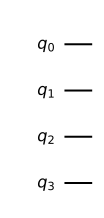

In [3]:
# n 비트 입력 문자열의 길이를 설정합니다.
n = 3

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw()

### 4.2 평형 오라클 <a id="balanced_oracle"></a>

In [4]:
balanced_oracle = QuantumCircuit(n+1)

다음으로 평형 오라클을 생성합니다. 1b 절에서 봤던것 처럼, 각 입력 큐비트를 제어로, 출력 비트를 대상으로 하는 CNOT을 수행함으로써 평형 오라클을 만들 수 있습니다. X 게이트의 제어 일부를 감싸서 0 또는 1을 주는 입력 상태를 변경할 수 있습니다. 감싸기 위한 제어를 지정하는 길이가 `n`인 이진 문자열을 먼저 선택합니다.

In [5]:
b_str = "101"

이제 이 문자열을 X 게이트를 배치할 키로 사용할 수 있습니다. 회로에 있는 각 큐비트에 대해, `b_str`에 대응되는 숫자가 `1` 이면 X 게이트를 배치하고 숫자가 `0`이면 아무것도 하지 않습니다.

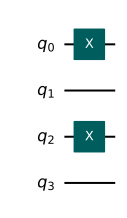

In [6]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# X-gates를 배치합니다.
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.draw()

다음으로 각 입력 큐비트를 제어로 사용하고 출력 큐비트를 대상으로 사용하여 controlled-NOT 게이트를 수행합니다.

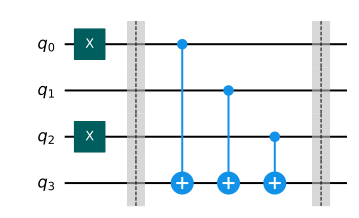

In [7]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# X-gates를 배치합니다.
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# barrier를 분리기로 사용합니다.
balanced_oracle.barrier()

# Controlled-NOT 게이트
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()
balanced_oracle.draw()

끝으로 2개의 셀에서 코드를 반복하여 X 게이트에서 컨트롤을 감싸는 것을 완료합니다.

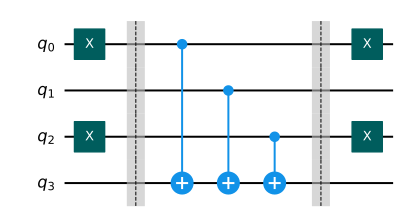

In [8]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# X-gate를 배치합니다.
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# barrier를 분리기로 사용합니다.
balanced_oracle.barrier()

# Controlled-NOT 게이트
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# X-gate를 배치합니다.
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# 오라클을 나타냅니다.
balanced_oracle.draw()

평형 오라클을 만들었습니다! 남은 것은 Deutsch-Jozsa 알고리즘으로 해결할 수 있는지 살펴보는 것입니다.

### 4.3 완전한 알고리즘 <a id="full_alg"></a>

이제 모든 것을 합쳐봅시다. 입력 큐비트를 $|{+}\rangle$ 상태로 출력 큐비트를 $|{-}\rangle$ 상태로 초기화 하는 것이 알고리즘의 첫 단계 입니다.

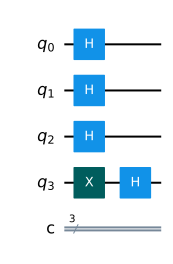

In [9]:
dj_circuit = QuantumCircuit(n+1, n)

# H-gate를 적용합니다.
for qubit in range(n):
    dj_circuit.h(qubit)

# 큐빗을 |-> 상태로 만듦니다.
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.draw()

다음으로 오라클을 적용해 봅시다. 위에서 만든 `balanced_oracle`를 적용합니다.

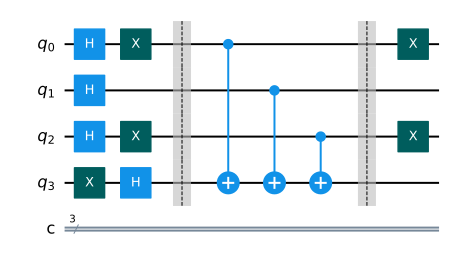

In [10]:
dj_circuit = QuantumCircuit(n+1, n)

# H-gate를 적용합니다.
for qubit in range(n):
    dj_circuit.h(qubit)

# 큐빗을 |-> 상태로 만듦니다.
dj_circuit.x(n)
dj_circuit.h(n)

# 오라클을 더합니다.
dj_circuit = dj_circuit.compose(balanced_oracle)
dj_circuit.draw()

끝으로 $n$ 입력 큐비트에 H 게이트를 수행하고 입력 레지스터를 측정합니다.

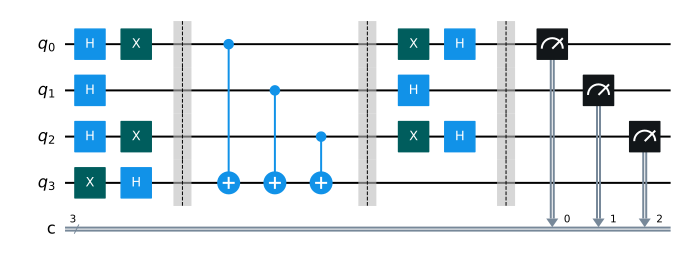

In [11]:
dj_circuit = QuantumCircuit(n+1, n)

# H-gate를 적용합니다.
for qubit in range(n):
    dj_circuit.h(qubit)

# 큐빗을 |-> 상태로 만듦니다.
dj_circuit.x(n)
dj_circuit.h(n)

# 오라클을 더합니다.
dj_circuit = dj_circuit.compose(balanced_oracle)

# H-gate를 반복합니다.
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# 측정합니다.
for i in range(n):
    dj_circuit.measure(i, i)

# 회로를 그립니다.
dj_circuit.draw()

출력을 알아봅시다.

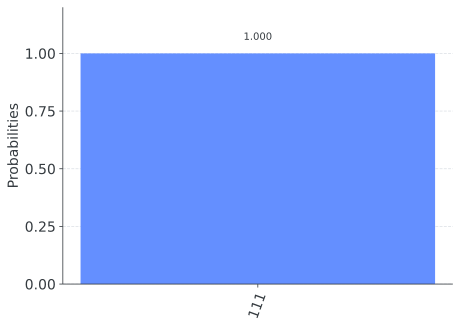

In [12]:
# 로컬 컴퓨터의 시뮬레이터를 사용합니다.
aer_sim = Aer.get_backend('aer_simulator')
results = aer_sim.run(dj_circuit).result()
answer = results.get_counts()

plot_histogram(answer)

In [13]:
# ...we have a 0% chance of measuring 000. 
assert answer.get('000', 0) == 0

위의 결과에서 `000`를 측정할 확률이 0%임을 알 수 있습니다. 이는 평형 함수임을 바르게 예측합니다.

### 4.4 일반화 회로 <a id="general_circs"></a>

아래에서는 Deutsch-Jozsa 오라클을 생성하고 양자 회로로 변환하는 일반화 함수를 만들어 봅니다. 이 함수는 `case`(`'balanced'` 또는 '`constant`')와 입력 레지스터의 크기인 `n`을 입력으로 받습니다.

In [14]:
def dj_oracle(case, n):
    # QunntumCircuit 객체를 만들어 반환합니다.
    # 회로에는 n+1 큐빗이 있습니다: 입력의 크기에 
    # 출력 큐빗 1개를 더한 것입니다.
    oracle_qc = QuantumCircuit(n+1)
    
    # 첫째로, 오라클이 balanced 인 경우를 다뤄봅시다.
    if case == "balanced":
        # 첫째로 X-gate에서 감쌀 CNOT을 알려주는
        # 난수를 생성합니다:
        b = np.random.randint(1,2**n)
        # 다음으로, 문자열 'b'에 길이를 의미하는 문자 'n'과 '0'을 더합니다 
        b_str = format(b, '0'+str(n)+'b')
        # 첫번째 X-gate를 배치합니다. 이진 문자열에서 각각의 숫자는
        # 한 큐빗에 대응됩니다.숫자가 0 이면 아무 것도 하지 않고 숫자가 1이면  
        # 그 큐빗에 X-gate를 적용합니다:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # 출력 큐빗을 대상으로 사용해서 각 큐빗에 대해 
        # controlled-NOT 게이트를 수행합니다.:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # 마지막 X-gate를 배치합니다
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # 오라클이 constant인 경우
    if case == "constant":
        # 첫째로 오라클의 고정 출력이 어떤것이 될지 결정합니다. 
        # (항상 0 또는 항상 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # 회로를 그릴때 보이기 위함
    return oracle_gate

오라클 게이트를 입력으로 받고 Deutsch-Jozsa 알고리즘을 수행하는 함수를 만들어 봅니다.

In [15]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # 출력 큐빗을 설정합니다:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # 그리고 입력 레지스터를 설정합니다:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # 회로에 오라클 게이트를 추가해봅시다:
    dj_circuit.append(oracle, range(n+1))
    # 마지막으로, H-gate를 다시 수행하고 측정합니다:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

끝으로 다음 함수를 사용하여 알고리즘을 실행해 보겠습니다.

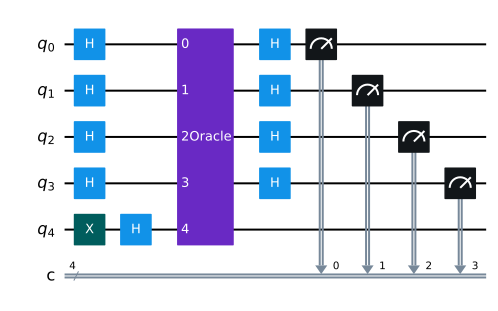

In [16]:
n = 4
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw()

그리고 이 회로를 수행한 결과를 봅시다.

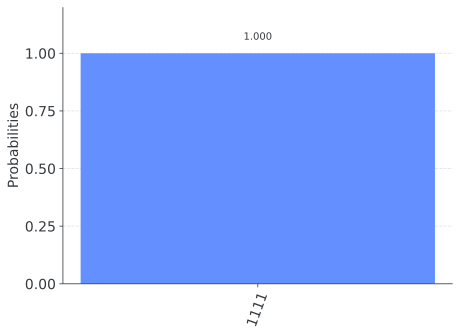

In [17]:
transpiled_dj_circuit = transpile(dj_circuit, aer_sim)
results = aer_sim.run(transpiled_dj_circuit).result()
answer = results.get_counts()
plot_histogram(answer)

## 5. 실제 장비를 사용한 실험 <a id="device"></a>

아래와 같이 실제 장비에서 회로를 실행할 수 있습니다. 우선 만든 회로를 처리할 가장 한가한 장비를 살펴봅니다.

In [18]:
# 저장된 IBMQ 게정을 불러오고 (n+1) 큐빗 보다 크거나 같은 가장 한가한 백엔드를 가져옵니다. 
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_manila


In [20]:
# 회로를 가장 한가한 백엔드에서 실행합니다. 대기열에 있는 작업의 실행을 지켜봅니다. 
from qiskit.tools.monitor import job_monitor

transpiled_dj_circuit = transpile(dj_circuit, backend, optimization_level=3)
job = backend.run(transpiled_dj_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


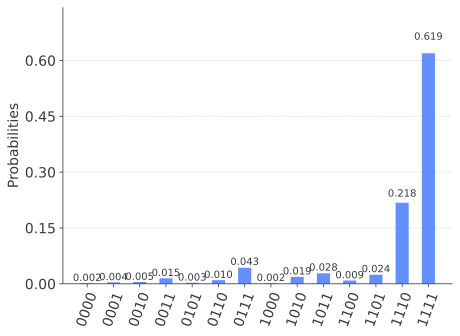

In [21]:
# 계산 결과를 얻습니다.
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

보시다시피 확률이 가장 높은 결과는 `1111` 입니다. 다른 결과는 양자 계산 오류로 인한 것입니다. 

In [22]:
# ...the most likely result is 1111.
assert max(answer, key=answer.get) == '1111'

## 6. 연습문제 <a id="problems"></a>

1. 다른 형태의 고정 오라클을 만들 수 있습니까?

2. 함수`dj_problem_oracle` (아래)는 게이트의 형태로 `n = 4`인 Deutsch-Jozsa 오라클을 반환합니다. 게이트는 입력으로 5개의 큐비트를 받으며, 마지막 큐비트인 (`q_4`)는 출력 큐비트입니다. (상단의 예제 오라클과 같이). `dj_problem_oracle` 에 1 에서 5 사이의 다른 정수를 전달하여 다른 오라클을 얻을 수 있습니다. 각 오라클이 평형 또는 고정인지 결정하기 위해서  Deutsch-Jozsa 알고리즘을 사용하십시오. (**주의사항:** 이 예제를 실행하기 위해 실제 장비 대신에 `aer_simulator`를 사용하는 것을 적극 권장합니다.)

In [23]:
from qiskit_textbook.problems import dj_problem_oracle
oracle = dj_problem_oracle(1)

## 7. 참고문헌 <a id="references"></a>

1. David Deutsch and Richard Jozsa (1992). "Rapid solutions of problems by quantum computation". Proceedings of the Royal Society of London A. 439: 553–558.  [doi:10.1098/rspa.1992.0167](https://doi.org/10.1098%2Frspa.1992.0167).
2. R. Cleve; A. Ekert; C. Macchiavello; M. Mosca (1998). "Quantum algorithms revisited". Proceedings of the Royal Society of London A. 454: 339–354. [doi:10.1098/rspa.1998.0164](https://doi.org/10.1098%2Frspa.1998.0164).

In [24]:
import qiskit.tools.jupyter
%qiskit_version_table